In [339]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd
import scipy.io
import numpy as np
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


# Plot the average shortest path length and the average clustering coefficient for all these networks on a single plot. Separately for each network, plot a histogram of the average shortest path length from each node (to every other node) and the clustering coefficient of each node.

In [199]:
mat = scipy.io.loadmat('Coactivation_matrix.mat')
G1 = nx.from_numpy_matrix(mat['Coactivation_matrix'],  create_using=nx.DiGraph())
mat = scipy.io.loadmat('macaque47.mat')
G2 = nx.from_numpy_matrix(mat['CIJ'],  create_using=nx.DiGraph())
mat = scipy.io.loadmat('macaque71.mat')
G3 = nx.from_numpy_matrix(mat['CIJ'],  create_using=nx.DiGraph())
mat = scipy.io.loadmat('fve30.mat')
G4 = nx.from_numpy_matrix(mat['CIJ'],  create_using=nx.DiGraph())
mat = scipy.io.loadmat('1995-journal-neuroscience-connectivity-cerebral-cortex-cat.mat')
G5 = nx.from_numpy_matrix(mat['CIJall'],  create_using=nx.DiGraph())
G6 = nx.read_edgelist('cerebral_cortex_markov_weighted_directed_interareal_macaque.edgelist', create_using=nx.DiGraph(), data=True)

In [201]:
graphs = [G1, G2, G3, G4, G5, G6]
names = ['Coactivation_matrix', 'macaque47', 'macaque71', 'fve30', 'connectivity-cerebral-cortex-cat', 'G_29x29']
weights = ['weighted', 'unweighted', 'unweighted', 'unweighted', 'weighted', 'weighted',]
df = pd.DataFrame({
            'Name': names,
            '#Nodes': [g.order() for g in graphs],
            '#Edges': [g.size() for g in graphs],
            'Density': [nx.density(g) for g in graphs],
            'Weighted': [w =='weighted' for w in weights],
            'Avg shortest path length using weights': [nx.average_shortest_path_length(g, weight='weight') for g in graphs],
            'Avg shortest path length without using weights': [nx.average_shortest_path_length(g, weight=None) for g in graphs]
            })
df.set_index('Name', inplace=True)
df

,#Edges,#Nodes,Avg shortest path length using weights,Avg shortest path length without using weights,Density,Weighted
Name,,,,,,
Coactivation_matrix,37250,638,0.081773,2.214874,0.091657,True
macaque47,505,47,2.054117,2.054117,0.233580,False
macaque71,746,71,2.296982,2.296982,0.150101,False
fve30,311,30,1.716092,1.716092,0.357471,False
connectivity-cerebral-cortex-cat,2126,95,2.273012,1.922620,0.238074,True
G_29x29,536,29,0.000055,1.339901,0.660099,True


**Note:** It is hard to compare average path lengths of these graphs since we have both weighted and unweighted graphs. For the rest of the analysis I will use unweighted graphs for doing path length calculations.

In [202]:
def analysis_a(G, graph_name):
    """
    Parameters
    ------------
    G: Networkx graph object
    graph_name: Name of the graph. (Used for saving the resultant
    dataframe with given graph name)
    
    Description
    -------------
    This function returns a table with average shortest path length 
    from each node (to every other node) and the clustering coefficient 
    of each node.
    """
    result = []
    cc=nx.clustering(G.to_undirected())
    for node in G.nodes():
        path_length=nx.single_source_dijkstra_path_length(G, node, weight=None)
        result.append([node, sum(path_length.values())/(G.order()-1), cc[node]])
    df = pd.DataFrame(result, columns=['node', 'avg_shortest_path_length', 'clustering_coeff'])
    df.to_csv('%s_avg_path_clustering_node_wise.csv' % graph_name, index=False)
    return df

In [352]:
df1 = analysis_a(G1, 'Coactivation_matrix')
df2 = analysis_a(G2, 'macaque47')
df3 = analysis_a(G3, 'macaque71')
df4 = analysis_a(G4, 'fve30')
df5 = analysis_a(G5, 'cerebral-cortex-cat')

In [353]:
df6 = analysis_a(G6, 'G_29x29_unweighted')

## Stacked histogram of the average shortest path length from each node (to every other node) and the clustering coefficient of each node for each given network.

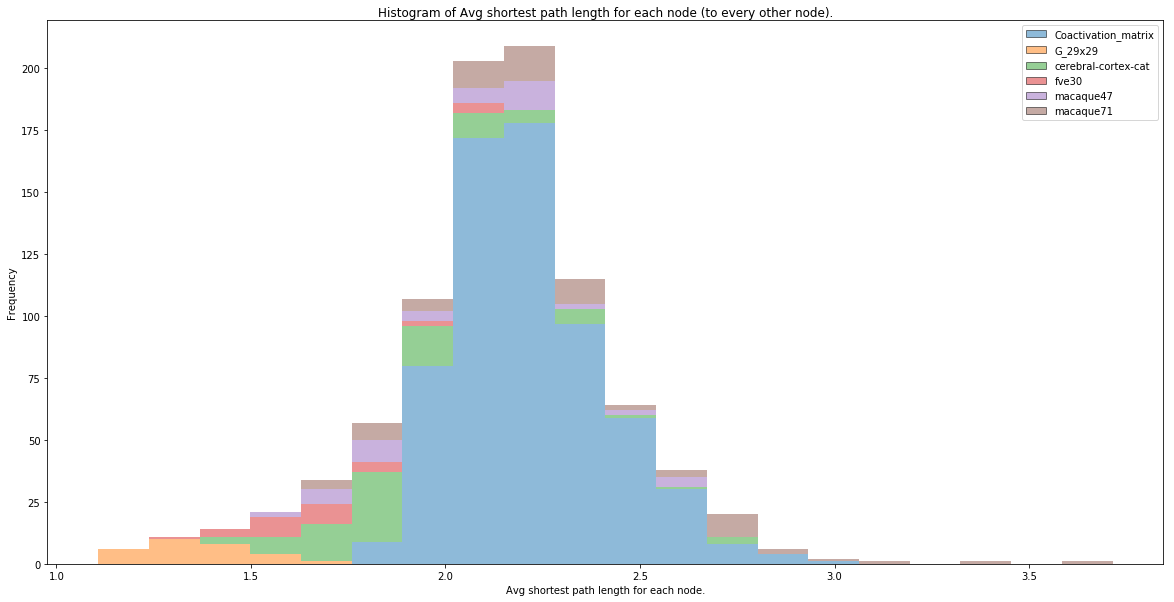

In [294]:
df = pd.DataFrame({
        'Coactivation_matrix': df1.avg_shortest_path_length,
        'macaque47': df2.avg_shortest_path_length,
        'macaque71': df3.avg_shortest_path_length,
        'fve30': df4.avg_shortest_path_length,
        'cerebral-cortex-cat': df5.avg_shortest_path_length,
        'G_29x29': df6.avg_shortest_path_length,
    })
plt.figure();
df.plot.hist(stacked=True, alpha=0.5, bins=20)
# plt.yscale('log')
plt.xlabel('Avg shortest path length for each node.')
plt.title('Histogram of Avg shortest path length for each node (to every other node).')

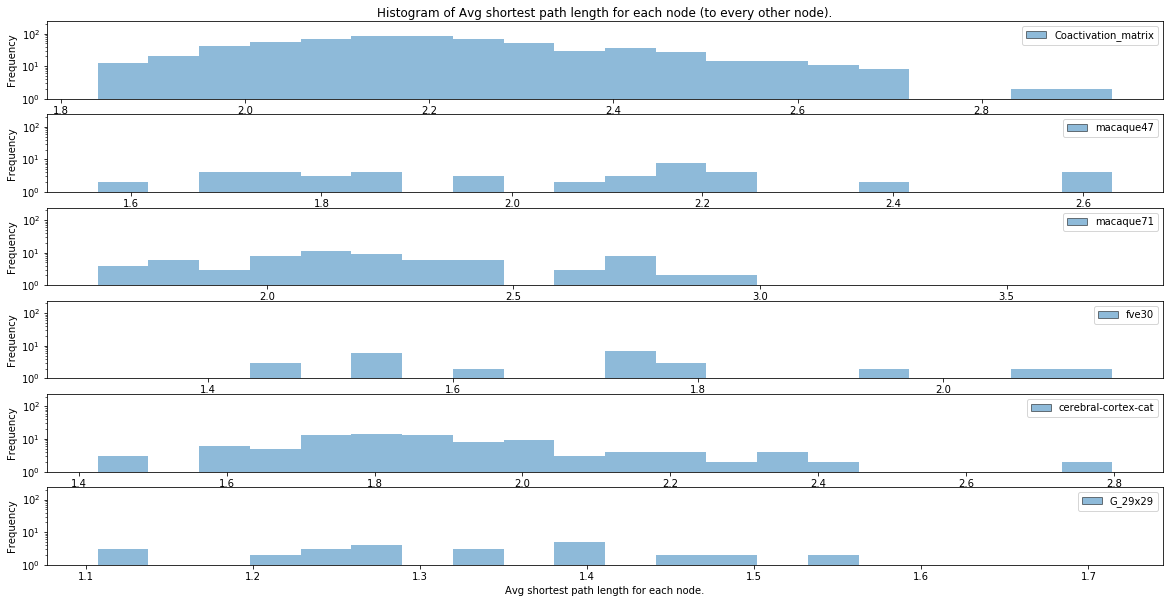

In [219]:
bins = 20
ax1 = plt.subplot(611)
pd.DataFrame({'Coactivation_matrix': df1.avg_shortest_path_length}).plot.hist(alpha=0.5, bins=bins, ax=ax1)
ax1.set_title('Histogram of Avg shortest path length for each node (to every other node).')


ax2 = plt.subplot(612, sharey=ax1)
pd.DataFrame({'macaque47': df2.avg_shortest_path_length}).plot.hist(alpha=0.5, bins=bins, ax=ax2)


ax3 = plt.subplot(613, sharey=ax1)
pd.DataFrame({'macaque71': df3.avg_shortest_path_length}).plot.hist(alpha=0.5, bins=bins, ax=ax3)



ax4 = plt.subplot(614, sharey=ax1)
pd.DataFrame({'fve30': df4.avg_shortest_path_length}).plot.hist(alpha=0.5, bins=bins, ax=ax4)


ax5 = plt.subplot(615, sharey=ax1)
pd.DataFrame({'cerebral-cortex-cat': df5.avg_shortest_path_length}).plot.hist(alpha=0.5, bins=bins, ax=ax5)


ax6 = plt.subplot(616, sharey=ax1)
pd.DataFrame({'G_29x29': df6.avg_shortest_path_length}).plot.hist(alpha=0.5, bins=bins, ax=ax6)


plt.yscale('log')
plt.xlabel('Avg shortest path length for each node.')

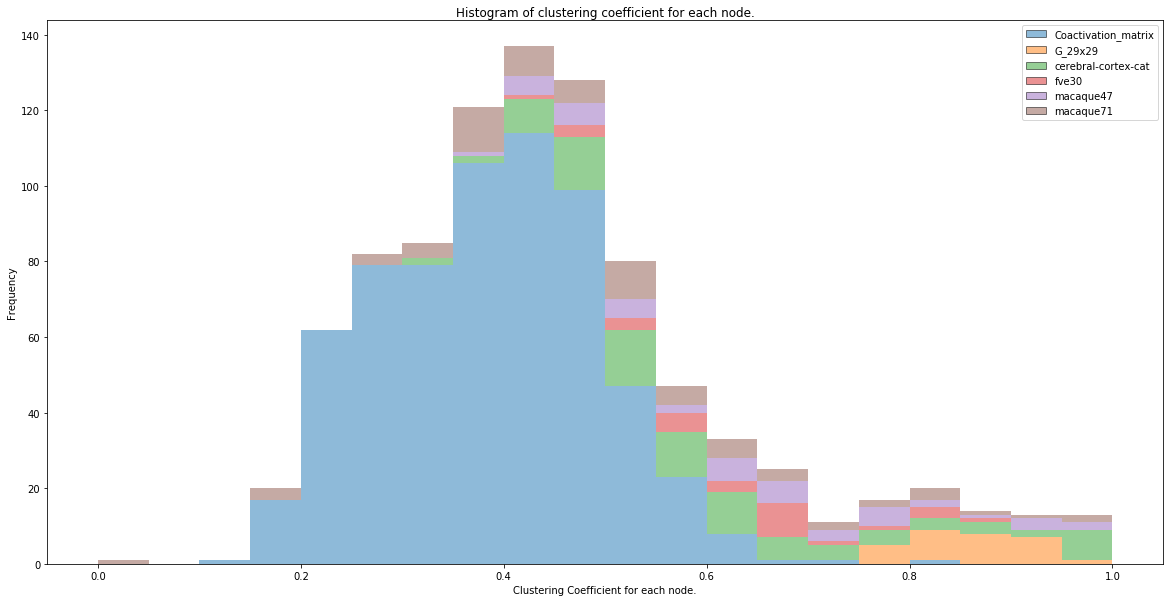

In [295]:
df = pd.DataFrame({
        'Coactivation_matrix': df1.clustering_coeff,
        'macaque47': df2.clustering_coeff,
        'macaque71': df3.clustering_coeff,
        'fve30': df4.clustering_coeff,
        'cerebral-cortex-cat': df5.clustering_coeff,
        'G_29x29': df6.clustering_coeff,

    })
plt.figure();
df.plot.hist(stacked=True, alpha=0.5, bins=20)
# plt.yscale('log')
plt.xlabel('Clustering Coefficient for each node.')
plt.title('Histogram of clustering coefficient for each node.')

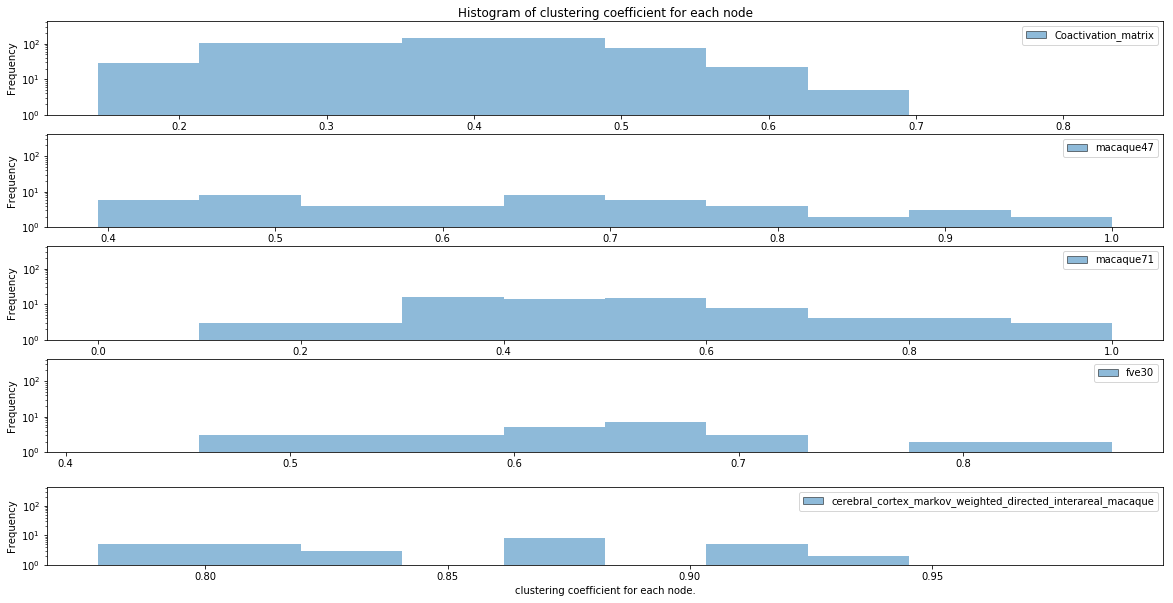

In [221]:
bins = 10
ax1 = plt.subplot(511)
pd.DataFrame({'Coactivation_matrix': df1.clustering_coeff}).plot.hist(alpha=0.5, bins=bins, ax=ax1)
ax1.set_title('Histogram of clustering coefficient for each node')


ax2 = plt.subplot(512, sharey=ax1)
pd.DataFrame({'macaque47': df2.clustering_coeff}).plot.hist(alpha=0.5, bins=bins, ax=ax2)


ax3 = plt.subplot(513, sharey=ax1)
pd.DataFrame({'macaque71': df3.clustering_coeff}).plot.hist(alpha=0.5, bins=bins, ax=ax3)



ax4 = plt.subplot(514, sharey=ax1)
pd.DataFrame({'fve30': df4.clustering_coeff}).plot.hist(alpha=0.5, bins=bins, ax=ax4)



ax5 = plt.subplot(515, sharey=ax1)
pd.DataFrame({'cerebral-cortex-cat': df5.clustering_coeff}).plot.hist(alpha=0.5, bins=bins, ax=ax5)


ax6 = plt.subplot(616, sharey=ax1)
pd.DataFrame({'cerebral_cortex_markov_weighted_directed_interareal_macaque': df6.clustering_coeff}).plot.hist(alpha=0.5, bins=bins, ax=ax6)


plt.yscale('log')
plt.xlabel('clustering coefficient for each node.')

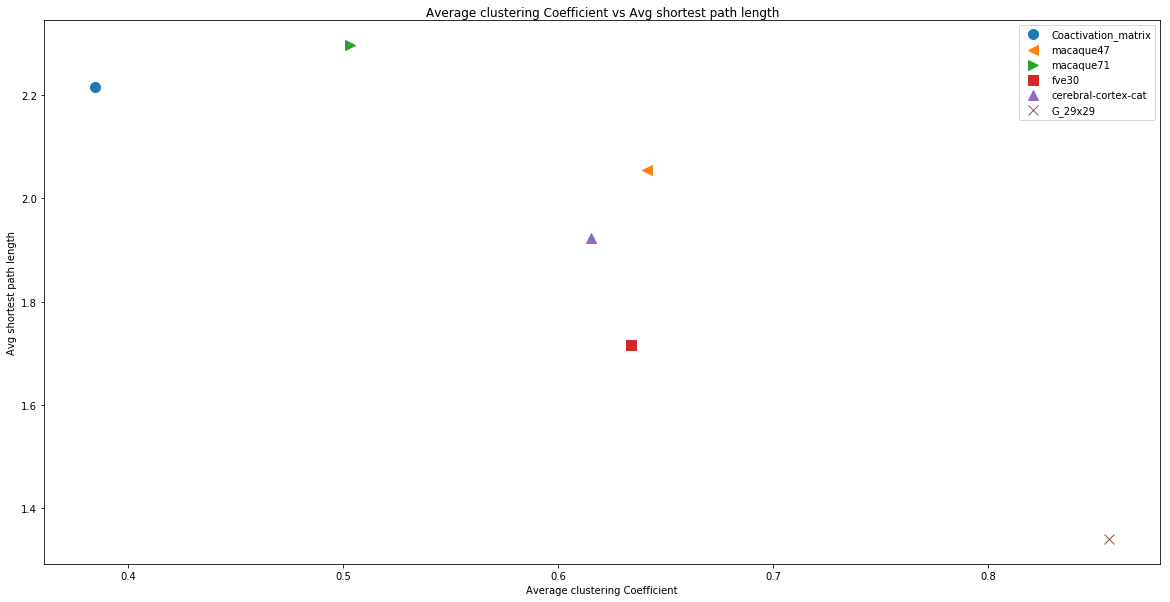

In [356]:
plt.figure()
plt.plot(df1.clustering_coeff.sum()/len(df1), df1.avg_shortest_path_length.sum()/len(df1), 'o', label='Coactivation_matrix', markersize=10)
plt.plot(df2.clustering_coeff.sum()/len(df2), df2.avg_shortest_path_length.sum()/len(df2), '<', label='macaque47', markersize=10)
plt.plot(df3.clustering_coeff.sum()/len(df3), df3.avg_shortest_path_length.sum()/len(df3), '>', label='macaque71', markersize=10)
plt.plot(df4.clustering_coeff.sum()/len(df4), df4.avg_shortest_path_length.sum()/len(df4), 's', label='fve30', markersize=10)
plt.plot(df5.clustering_coeff.sum()/len(df5), df5.avg_shortest_path_length.sum()/len(df5), '^', label='cerebral-cortex-cat', markersize=10)
plt.plot(df6.clustering_coeff.sum()/len(df6), df6.avg_shortest_path_length.sum()/len(df6), 'x', label='G_29x29', markersize=10)
legend = plt.legend(loc='upper right')
plt.xlabel('Average clustering Coefficient')
plt.ylabel('Avg shortest path length')
plt.title('Average clustering Coefficient vs Avg shortest path length')

In [286]:
areas = ['24c','F1','F2','F7','F5','ProM','V1','V2','V4','TEO','MT','TEpd','STPc','STPi','STPr','PBr',
         '5','DP','7m','7A','7B','8B','8m','8l', '9/46d','46d','9/46v','2','10']
df = pd.read_csv('2012-cerebral-cortex-markov-weighted-directed-interareal-macaque.txt', delimiter='\t')
G = nx.DiGraph()
for index, row in df.iterrows():
    if not G.has_edge(row['SOURCE'], row['TARGET']):
        G.add_edge(row['SOURCE'], row['TARGET'], weight=row['FLNe'])

In [287]:
areas = ['24c','F1','F2','F7','F5','ProM','V1','V2','V4','TEO','MT','TEpd','STPc','STPi','STPr','PBr',
         '5','DP','7m','7A','7B','8B','8m','8l', '9/46d','46d','9/46v','2','10']
len(areas)

29

In [225]:
G29 = G.subgraph(areas)
fh=open("cerebral_cortex_markov_weighted_directed_interareal_macaque.edgelist",'wb')
nx.write_edgelist(G29, fh)

In [228]:
def my_avg_shortest_path_length(G):
    avg = 0.0 
    for node in G.nodes():
        path_length = nx.single_source_shortest_path_length(G, node)
        avg += sum(path_length.values())
    return avg/(G.order()*(G.order()-1))
        
def avg_path_length(G, density, seed=None, trials=100):
    avg_path_lengths = []
    for i in range(trials):
        if seed is not None:
            random.seed(seed)
        H = G.copy()
        while nx.density(H) > density:
            u,v = random.choice(H.edges())
            H.remove_edge(u, v)
        avg_path_lengths.append(my_avg_shortest_path_length(H))
    df = pd.DataFrame(avg_path_lengths, columns=['avg_shortest_path_length'])
    return density, df.avg_shortest_path_length.mean(), df.avg_shortest_path_length.std()

In [229]:
result=[]
for i in range(1,7):
    result.append(list(avg_path_length(G29, i/10)))

In [230]:
df = pd.DataFrame(result, columns=['density','l_mean', 'l_std'])
df.to_csv('density_vs_avg_path_length_cerebral_cortex_markov_weighted_directed_interareal_macaque.csv')

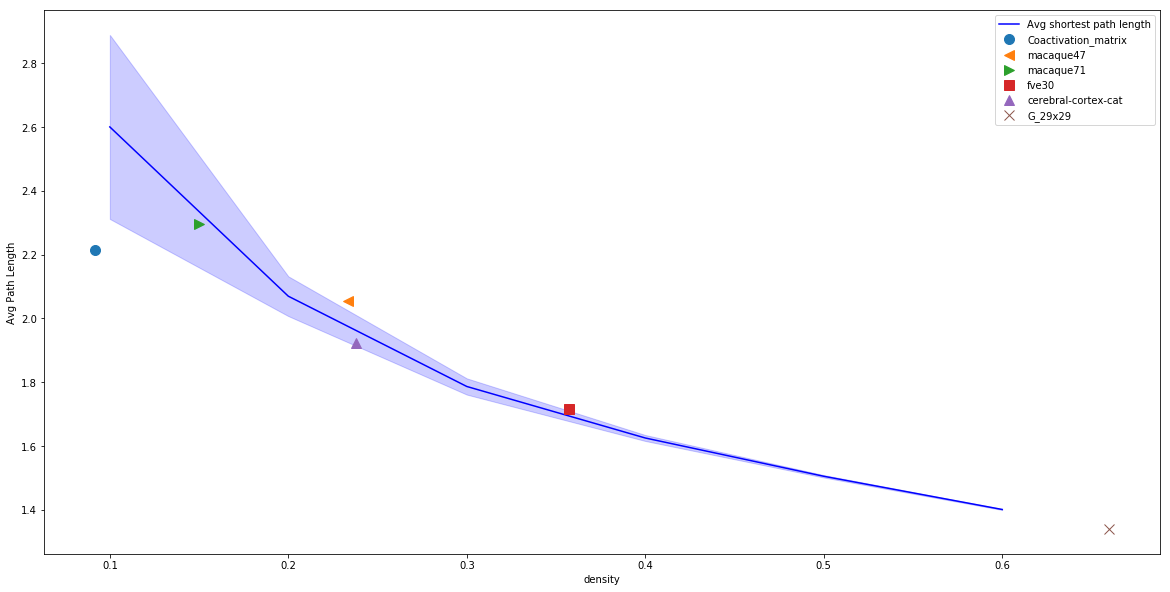

In [232]:
plt.figure()
ax = plt.plot(df.density, df.l_mean, 'b', label='Avg shortest path length')
plt.fill_between(df.density, df.l_mean-df.l_std, df.l_mean+df.l_std, color='b', alpha=0.2)
plt.plot(nx.density(G1), df1.avg_shortest_path_length.sum()/len(df1), 'o', label='Coactivation_matrix', markersize=10)
plt.plot(nx.density(G2), df2.avg_shortest_path_length.sum()/len(df2), '<', label='macaque47', markersize=10)
plt.plot(nx.density(G3), df3.avg_shortest_path_length.sum()/len(df3), '>', label='macaque71', markersize=10)
plt.plot(nx.density(G4), df4.avg_shortest_path_length.sum()/len(df4), 's', label='fve30', markersize=10)
plt.plot(nx.density(G5), df5.avg_shortest_path_length.sum()/len(df5), '^', label='cerebral-cortex-cat', markersize=10)
plt.plot(nx.density(G6), df6.avg_shortest_path_length.sum()/len(df6), 'x', label='G_29x29', markersize=10)

legend = plt.legend(loc='upper right')
plt.xlabel('density')
plt.ylabel('Avg Path Length')

In [297]:
df = pd.read_csv('2012-cerebral-cortex-markov-weighted-directed-interareal-macaque.txt', delimiter='\t')
df.MONKEY.describe()

count       1989
unique        32
top       M116RH
freq         133
Name: MONKEY, dtype: object

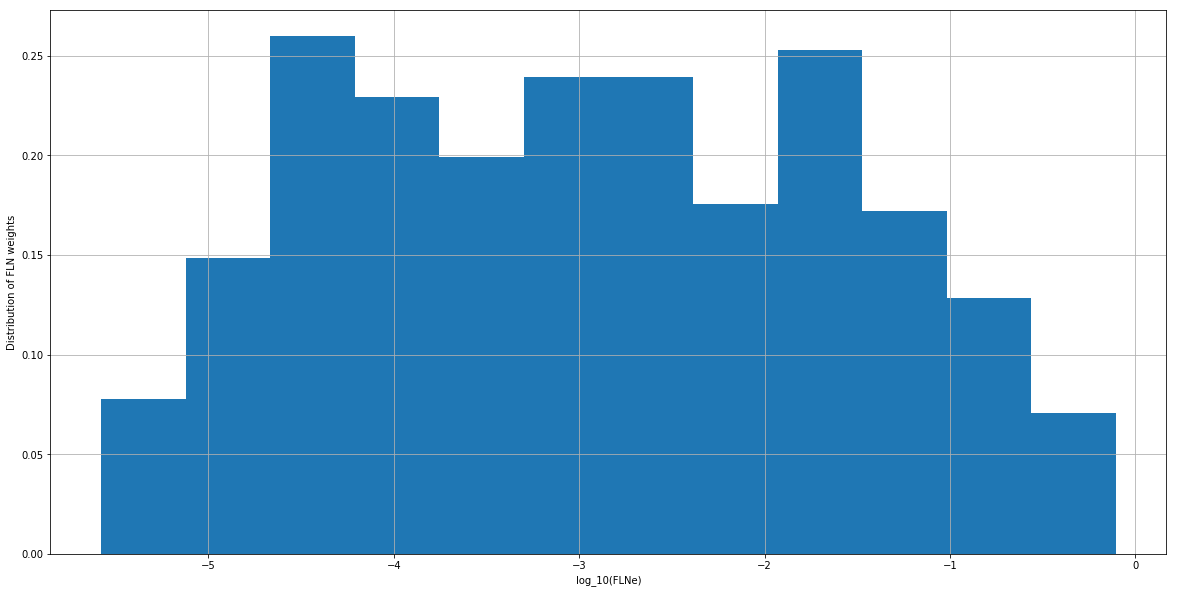

In [350]:
ax = df[(df.SOURCE.isin(areas)) & (df.TARGET.isin(areas))].FLNe.apply(lambda x: math.log(x, 10)).hist(normed=True, bins=12)
ax.set_xlabel('log_10(FLNe)')
ax.set_ylabel('Distribution of FLN weights')

In [342]:
import math
df1 = df[(df.SOURCE.isin(areas)) & (df.TARGET.isin(areas))]
df1.FLNe = df1.FLNe.apply(lambda x: math.log(x, 10))
df1['bucket'] = pd.cut(df1.FLNe, bins=np.arange(-6,0.5,0.5))
# df1[['bucket']].groupby('bucket').sum()
df1.head()

/Users/adb/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/adb/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,CASE,MONKEY,SOURCE,TARGET,FLNe,NEURONS,STATUS,BIBLIOGRAPHY,bucket
0,1,M81LH,V2,V1,-0.115771,86132.0,Known,1-8,"(-0.5, 0]"
3,1,M81LH,V4,V1,-0.931814,13171.0,Known,"1-3, 5, 7, 10-11","(-1, -0.5]"
7,1,M81LH,DP,V1,-3.749580,20.0,NFP,NaN,"(-4, -3.5]"
8,1,M81LH,STPr,V1,-4.573489,3.0,NFP,NaN,"(-5, -4.5]"
9,1,M81LH,STPi,V1,-3.272459,60.0,Known,12,"(-3.5, -3]"


In [343]:
newdf = df1[['bucket', 'CASE']].groupby('bucket').count()
newdf = newdf.reset_index()
newdf['ratio'] = newdf.CASE.apply(lambda x: x/newdf.CASE.sum())
newdf

,bucket,CASE,ratio
0,"(-6, -5.5]",7,0.010769
1,"(-5.5, -5]",23,0.035385
2,"(-5, -4.5]",60,0.092308
3,"(-4.5, -4]",86,0.132308
4,"(-4, -3.5]",67,0.103077
5,"(-3.5, -3]",79,0.121538
6,"(-3, -2.5]",80,0.123077
7,"(-2.5, -2]",55,0.084615
8,"(-2, -1.5]",79,0.121538
9,"(-1.5, -1]",56,0.086154


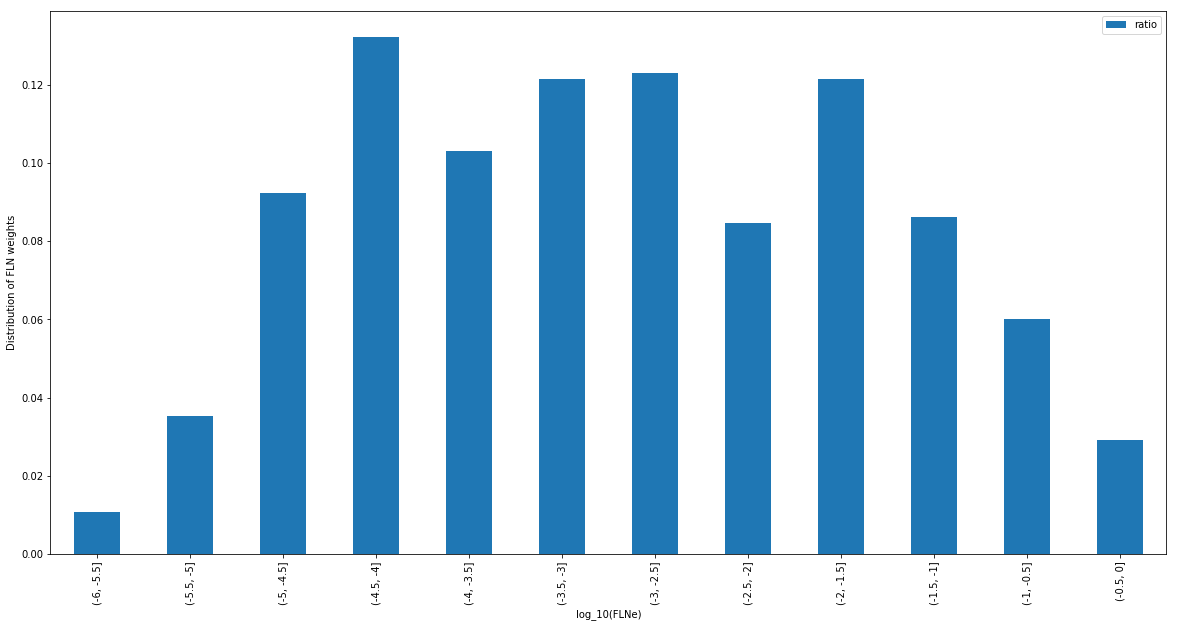

In [349]:
ax = newdf.plot(x='bucket', y='ratio', kind='bar')
ax.set_xlabel('log_10(FLNe)')
ax.set_ylabel('Distribution of FLN weights')